In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
BASE_PATH = os.path.join(os.getcwd(), os.pardir)
DATA_PATH = os.path.join(BASE_PATH, 'data')

In [3]:
train_df = pd.read_json(os.path.join(DATA_PATH, 'train.json.zip'))

In [5]:
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


# Identifying outliers & missing values
## Price

We wish to determine how many listings in the training set are missing price data.

Note that the listing consists entirely of apartment rentals (i.e. the properties themselves are not for sale, and houses/townhouses are excluded).

In [4]:
missing_price = len(train_df[train_df.astype(str)['price'].isnull()])

missing_price

0

### Price Boxplot

In [5]:
price = train_df[['price']]

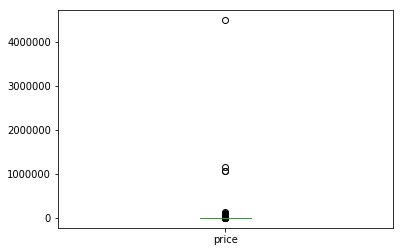

In [6]:
price.plot(kind='box')

### Outlier investigation (high values)

As seen above, there appear to be a few outliers. Most prices are less than \\$500000, which is expected given these are rentals. There are a few outliers, a few around \\$1 million, and one well above \\$4 million. We decide to investigate these entries in more detail.

In [6]:
train_df[(train_df['price'] > 500000)] 

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
12168,1.0,2,5d3525a5085445e7fcd64a53aac3cb0a,2016-06-24 05:02:58,,West 116th Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",40.8011,7208794,-73.9480,d1737922fe92ccb0dc37ba85589e6415,[],1150000,40 West 116th Street,low
32611,1.0,2,cd25bbea2af848ebe9821da820b725da,2016-06-24 05:02:11,,Hudson Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",40.7299,7208764,-74.0071,d1737922fe92ccb0dc37ba85589e6415,[],4490000,421 Hudson Street,low
55437,1.0,1,37385c8a58176b529964083315c28e32,2016-05-14 05:21:28,,West 57th Street,"[Doorman, Cats Allowed, Dogs Allowed]",40.7676,7013217,-73.9844,8f5a9c893f6d602f4953fcc0b8e6e9b4,[],1070000,333 West 57th Street,low
57803,1.0,1,37385c8a58176b529964083315c28e32,2016-05-19 02:37:06,This 1 Bedroom apartment is located on a prime...,West 57th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",40.7676,7036279,-73.9844,18133bc914e6faf6f8cc1bf29d66fc0d,[https://photos.renthop.com/2/7036279_924b52f0...,1070000,333 West 57th Street,low


All four apartments exceed \\$1 million. It is unclear why the values are so high. Perhaps they were meant to be listed as 'for sale', or the prices have typos. Alternatively, they are legitimate postings for exceptionally lavish apartments. However, this is unlikely because a renthop search for NYC in January 29, 2020 shows that the highest priced rental is only \\$50,000 per month. 

Thus, we go ahead with removing these four entries from our training set.

### Outlier investigation (low values)

Now let's consider the opposite issue of values being unusually low. Since it is difficult tell from the boxplot, we sort the values in increasing order and display the first few values.

In [9]:
train_df['price'].sort_values()

53144          43
87511          45
117339        401
113599        695
113552        695
           ...   
123877     135000
55437     1070000
57803     1070000
12168     1150000
32611     4490000
Name: price, Length: 49352, dtype: int64

There are two unusually low values in the training set: 43 and 45. Let's look at them in more detail.

In [11]:
train_df[train_df['price'] < 100]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
53144,1.0,0,64f8e51f01a36ab0cd55fe9de2381306,2016-05-24 05:24:56,<p><a website_redacted,Madison,"[Doorman, Elevator, High Speed Internet]",40.7120,7060255,-73.9971,29ebd2f6553fbe12706a006a97349dd6,[],43,60 Madison,low
87511,1.0,0,d992b617c630de9c7b903a54562682dc,2016-04-02 02:43:15,<p><a website_redacted,W 30th St.,[Elevator],40.7479,6813772,-73.9917,29ebd2f6553fbe12706a006a97349dd6,[https://photos.renthop.com/2/6813772_323b9438...,45,140 W 30th St.,low


The two entries look somewhat legitimate, other than the fact that the descriptions contain "website_redacted". However, because the rent values are unrealistically low for NYC, we must assume that the prices are erroneous. Because we do not know what the true price is, we remove these data points.

### Final outlier removal

Summarizing our investigation into unusually high and low listing prices, we have decided to retain listings between \\$100 and \\$1 million.

In [21]:
price_filtered = train_df[(train_df['price'] > 100) & (train_df['price'] < 1000000)]['price']

### Price distribution, after outlier removal

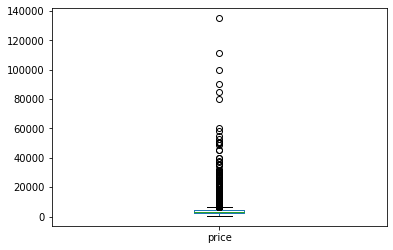

In [24]:
price_filtered.plot(kind='box')

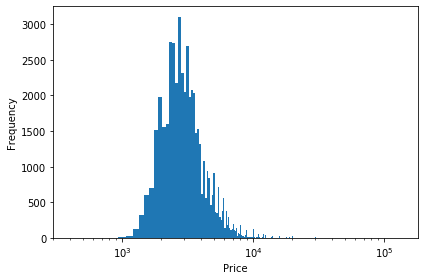

In [26]:
ax = price_filtered.plot.hist(bins=1000, logx=True)
ax.set_xlabel('Price')
plt.tight_layout()

From the histogram, it is evident that the vast majority of listings fall between \\$1,000 and \\$10,000. This is consistent with what we know about current-day NYE rental prices.

## Latitude/Longitude

We now focus our attention on looking for outliers in latitude and longitude. Like price, these features together may be informative in predicting interest level.

### Latitude

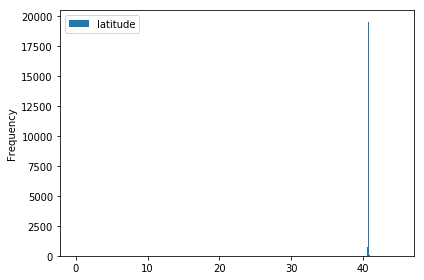

In [25]:
lats = train_df[['latitude']]

lats.plot.hist(bins=1000)
plt.tight_layout()

It appears that most of the data is around 41° N. This is consistent with the fact that NYC's actual coordinates are:

40.7128° N, 74.0060° W

But why does the histogram look so compressed? Notably, the x-axis ranges from 0 to 40. Perhaps there are some latitude values of 0...

In [34]:
missing_latitude = train_df[train_df['latitude'] == 0]

missing_latitude

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
2028,1.0,1,1490317c3a31185f0c8115f01d1acc5b,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn","[hardwood floors, own entrance, oak cabinets]",0.0,7087715,0.0,2290f91e45472ecaf0983c5af18098ce,[https://photos.renthop.com/2/7087715_mb_3517f...,1750,145 28 Street,low
37426,1.0,1,0,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,"[Reduced Fee, Cats Allowed]",0.0,7094527,0.0,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7094527_mb_7f196...,1725,Van Sicklen street,low
39134,1.0,2,a1b2bd0758c6f14be815e4d9382b8169,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy","[Views, No Fee, Duplex, Laundry in Unit, Cats ...",0.0,7174094,0.0,42cb18c3898c42b7512065e7d3e1e8bd,[https://photos.renthop.com/2/7174094_mb_e3c7e...,4395,219 E 28th,low
46941,1.0,2,8f837ada8d7ec5d251a369cd5909af7c,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,"[Laundry in Unit, Roof Deck, <null>]",0.0,6981091,0.0,b93b333035403fc090fb51372fb082f9,[https://photos.renthop.com/2/6981091_mb_efd73...,2950,1632 Madison Ave,medium
49884,1.0,2,ebb1fe8e32b8565f057a20abc495a2b5,2016-05-10 10:25:19,"New construction, luxury highrise, The two bed...",24th St LIC,"[Doorman, Fitness Center, Laundry in Unit, Cat...",0.0,6991620,0.0,dd85ae9242e4012be8a386d37c1d9453,[https://photos.renthop.com/2/6991620_mb_e7c05...,3619,41-42 24th St,low
63688,4.0,3,f389c8eb16e5d0c771615fb30f3cc9d6,2016-05-11 18:07:15,"This high floor, mint condition, corner unit b...",450 East 83rd Street apt 21D (Furnished),"[Furnished, Laundry In Unit, Cats Allowed, Dog...",0.0,6997950,0.0,355ccd9223a7481c5d223d39b4e65e90,[https://photos.renthop.com/2/6997950_4ef02f8c...,16500,450 East 83rd Street,low
66197,1.0,1,4d7c804afea366c666731bee9c56919e,2016-05-10 14:30:12,NO FEE! Spacious one bedroom apartment in a F...,west 87,"[Doorman, Fitness Center, No Fee, Cats Allowed...",0.0,6991901,0.0,7d4f285c15b11c61bacfbf8e7a49252d,[https://photos.renthop.com/2/6991901_mb_e3232...,3600,247 west 87,low
69423,1.0,2,55ab81a4ccd5ea862fba344dc29f1463,2016-05-24 17:43:39,Fantastic 2 bed with the works! It has 2 queen...,118 W 109th,"[Cats Allowed, Dogs Allowed, No Fee, Laundry i...",0.0,7062134,0.0,91c09ae8bfdc7e5ba7d6385e33a6064d,[https://photos.renthop.com/2/7062134_mb_9f18c...,3200,118 W 109th,low
70841,1.0,1,09e6efa1a58a3cd753aeee80bdf5ec36,2016-05-10 10:11:20,No fee! Prime NOLITA neighborhood with amazing...,Mott St,"[No Fee, <null>]",0.0,6991613,0.0,dd85ae9242e4012be8a386d37c1d9453,[https://photos.renthop.com/2/6991613_mb_b7cec...,3495,246 Mott St,low
76934,1.0,2,cf6bfdca7e8ffdb3fa5f7d8d85005e4a,2016-05-26 14:19:38,"*Mgmt is accepting June 1st, 15th, July 1st, o...",106th/Central Park,"[Cats Allowed, Dogs Allowed, No Fee, Laundry i...",0.0,7072634,0.0,91c09ae8bfdc7e5ba7d6385e33a6064d,[https://photos.renthop.com/2/7072634_mb_90dba...,3200,21 W 106th,low


In [30]:
missing_latitude.shape[0]

12

There are 12 rentals with latitude 0. A latitude of 0 degrees may make sense if the city is directly above the Equator, but since we are talking about New York City, this is impossible. Therefore, a latitude of 0 implies missing latitude information.

Interestingly enough, all 12 rentals have longitude values of 0 as well. But let's look into longitude separately...

### Longitude

Since a latitude of 0 can exist in the data, we also search for longitude values of 0.

In [35]:
missing_longitude = train_df[train_df['longitude']==0]
missing_longitude

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
2028,1.0,1,1490317c3a31185f0c8115f01d1acc5b,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn","[hardwood floors, own entrance, oak cabinets]",0.0,7087715,0.0,2290f91e45472ecaf0983c5af18098ce,[https://photos.renthop.com/2/7087715_mb_3517f...,1750,145 28 Street,low
37426,1.0,1,0,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,"[Reduced Fee, Cats Allowed]",0.0,7094527,0.0,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7094527_mb_7f196...,1725,Van Sicklen street,low
39134,1.0,2,a1b2bd0758c6f14be815e4d9382b8169,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy","[Views, No Fee, Duplex, Laundry in Unit, Cats ...",0.0,7174094,0.0,42cb18c3898c42b7512065e7d3e1e8bd,[https://photos.renthop.com/2/7174094_mb_e3c7e...,4395,219 E 28th,low
46941,1.0,2,8f837ada8d7ec5d251a369cd5909af7c,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,"[Laundry in Unit, Roof Deck, <null>]",0.0,6981091,0.0,b93b333035403fc090fb51372fb082f9,[https://photos.renthop.com/2/6981091_mb_efd73...,2950,1632 Madison Ave,medium
49884,1.0,2,ebb1fe8e32b8565f057a20abc495a2b5,2016-05-10 10:25:19,"New construction, luxury highrise, The two bed...",24th St LIC,"[Doorman, Fitness Center, Laundry in Unit, Cat...",0.0,6991620,0.0,dd85ae9242e4012be8a386d37c1d9453,[https://photos.renthop.com/2/6991620_mb_e7c05...,3619,41-42 24th St,low
63688,4.0,3,f389c8eb16e5d0c771615fb30f3cc9d6,2016-05-11 18:07:15,"This high floor, mint condition, corner unit b...",450 East 83rd Street apt 21D (Furnished),"[Furnished, Laundry In Unit, Cats Allowed, Dog...",0.0,6997950,0.0,355ccd9223a7481c5d223d39b4e65e90,[https://photos.renthop.com/2/6997950_4ef02f8c...,16500,450 East 83rd Street,low
66197,1.0,1,4d7c804afea366c666731bee9c56919e,2016-05-10 14:30:12,NO FEE! Spacious one bedroom apartment in a F...,west 87,"[Doorman, Fitness Center, No Fee, Cats Allowed...",0.0,6991901,0.0,7d4f285c15b11c61bacfbf8e7a49252d,[https://photos.renthop.com/2/6991901_mb_e3232...,3600,247 west 87,low
69423,1.0,2,55ab81a4ccd5ea862fba344dc29f1463,2016-05-24 17:43:39,Fantastic 2 bed with the works! It has 2 queen...,118 W 109th,"[Cats Allowed, Dogs Allowed, No Fee, Laundry i...",0.0,7062134,0.0,91c09ae8bfdc7e5ba7d6385e33a6064d,[https://photos.renthop.com/2/7062134_mb_9f18c...,3200,118 W 109th,low
70841,1.0,1,09e6efa1a58a3cd753aeee80bdf5ec36,2016-05-10 10:11:20,No fee! Prime NOLITA neighborhood with amazing...,Mott St,"[No Fee, <null>]",0.0,6991613,0.0,dd85ae9242e4012be8a386d37c1d9453,[https://photos.renthop.com/2/6991613_mb_b7cec...,3495,246 Mott St,low
76934,1.0,2,cf6bfdca7e8ffdb3fa5f7d8d85005e4a,2016-05-26 14:19:38,"*Mgmt is accepting June 1st, 15th, July 1st, o...",106th/Central Park,"[Cats Allowed, Dogs Allowed, No Fee, Laundry i...",0.0,7072634,0.0,91c09ae8bfdc7e5ba7d6385e33a6064d,[https://photos.renthop.com/2/7072634_mb_90dba...,3200,21 W 106th,low


In [33]:
missing_longitude.shape[0]

12

The above 12 rows with missing longitude are idential to the 12 rows with missing latitude.

### Handling missing lat/lon data

Unlike price outliers (which all had target value of 'low'), rows with missing lat/lon data actually vary in the label. There is one listing that has interest level 'medium'. Thus, it may not be prudent to remove these rows from the training set. Instead, we will substitute/impute these values with coordinates based on the address.

Since there are only 12 addresses, this step can be performed manually by looking up the coordinate of each address (street_address).

In [36]:
train_df.loc[train_df['listing_id'] == 7087715, 'latitude'] = 40.65876
train_df.loc[train_df['listing_id'] == 7087715, 'longitude'] = -73.99971

train_df.loc[train_df['listing_id'] == 7094527, 'latitude'] = 40.597351
train_df.loc[train_df['listing_id'] == 7094527, 'longitude'] = -73.974953

train_df.loc[train_df['listing_id'] == 7174094, 'latitude'] = 40.741722
train_df.loc[train_df['listing_id'] == 7174094, 'longitude'] = -73.980286

train_df.loc[train_df['listing_id'] == 6981091, 'latitude'] = 40.793788
train_df.loc[train_df['listing_id'] == 6981091, 'longitude'] = -73.949379

train_df.loc[train_df['listing_id'] == 6991620, 'latitude'] = 40.754372
train_df.loc[train_df['listing_id'] == 6991620, 'longitude'] = -73.938271

train_df.loc[train_df['listing_id'] == 6997950, 'latitude'] = 40.773941
train_df.loc[train_df['listing_id'] == 6997950, 'longitude'] = -73.948471

train_df.loc[train_df['listing_id'] == 6997950, 'latitude'] = 40.773941
train_df.loc[train_df['listing_id'] == 6997950, 'longitude'] = -73.948471

train_df.loc[train_df['listing_id'] == 6991901, 'latitude'] = 40.78775
train_df.loc[train_df['listing_id'] == 6991901, 'longitude'] = -73.973091

train_df.loc[train_df['listing_id'] == 6991901, 'latitude'] = 40.78775
train_df.loc[train_df['listing_id'] == 6991901, 'longitude'] = -73.973091

train_df.loc[train_df['listing_id'] == 7062134, 'latitude'] = 40.801037
train_df.loc[train_df['listing_id'] == 7062134, 'longitude'] = -73.961136

train_df.loc[train_df['listing_id'] == 6991613, 'latitude'] = 40.723129
train_df.loc[train_df['listing_id'] == 6991613, 'longitude'] = -73.994857

train_df.loc[train_df['listing_id'] == 7072634, 'latitude'] = 40.798981
train_df.loc[train_df['listing_id'] == 7072634, 'longitude'] = -73.96228

train_df.loc[train_df['listing_id'] == 6896885, 'latitude'] = 40.756149
train_df.loc[train_df['listing_id'] == 6896885, 'longitude'] = -73.965714

train_df.loc[train_df['listing_id'] == 6888639, 'latitude'] = 40.681404
train_df.loc[train_df['listing_id'] == 6888639, 'longitude'] = -73.9338

Let's verify that the coordinate values have been updated.

In [37]:
train_df[train_df['listing_id'] == 6888639][['latitude', 'longitude']]

,latitude,longitude
106350,40.681404,-73.9338


## Bathrooms

In [29]:
baths = train_df[['bathrooms']]

baths.sort_values('bathrooms')

,bathrooms
115414,0.0
39813,0.0
53671,0.0
8973,0.0
82931,0.0
...,...
91709,6.0
79611,6.0
26937,6.5
84566,7.0


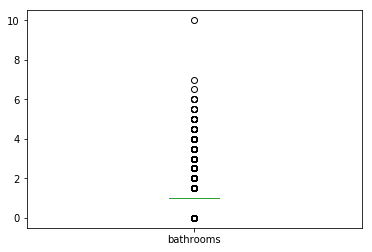

In [30]:
baths.plot(kind='box')

In [31]:
missing_baths = len(train_df[(train_df['bathrooms'].isnull()) | (train_df['bathrooms']==0)])

missing_baths

313

Imputing bathroom values of 0 to mode of bathrooms

In [46]:
bath_mode = baths.mode().values[0][0]

In [42]:
train_df.loc[train_df['bathrooms'] == 0, 'bathrooms'] = bath_mode

In [45]:
train_df.sort_values(by='bathrooms')

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
78286,1.0,3,abb2b16b6783b5cbfd63894f26581576,2016-05-07 04:59:16,This is a great newly renovated 3 bedroom. Apa...,East 106th Street,"[Washer in Unit, Dryer in Unit, Dishwasher, No...",40.7900,6980134,-73.9416,cab9c9344919c3c5e7694f0d8c0ac7e8,[https://photos.renthop.com/2/6980134_41ea3289...,2895,314 East 106th Street,medium
78288,1.0,2,6b3fbd289f786a2fdac1bf8aed04060e,2016-05-04 02:47:21,Description: Great Deal! Large and Sunny Two b...,E 52 Street,"[Elevator, Laundry in Building, Dishwasher, Ha...",40.7555,6962856,-73.9666,2637547481b1d0b116843dcd4cf94211,[https://photos.renthop.com/2/6962856_267305e7...,3600,324 E 52 Street,low
78300,1.0,3,7d0a8a49b80d9329a3098b15ac8fd1bc,2016-05-12 02:28:38,Gorgeous 3 bedroom apartment! High end custom ...,W 50 St.,"[Pre-War, Laundry in Unit, Dishwasher, Hardwoo...",40.7644,6999565,-73.9905,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6999565_63f5b2d6...,4495,439 W 50 St.,low
78308,1.0,1,125741f94ec302e52b6adf6f051ade9b,2016-05-05 01:22:05,Apartment for rent in Elmhurst 11373 SUBJECT ...,4035 Hampton Street,"[elevator, pets]",40.7467,6965851,-73.8815,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6965851_56c74e65...,1900,4035 Hampton Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91709,6.0,6,d20bce0bc08b2731f726067a1e501162,2016-04-16 02:22:15,MANSION IN THE SKY!!! This six-bedroom full-fl...,230 West 56th Street,"[Doorman, Elevator, Furnished, Laundry in Unit...",40.7654,6881666,-73.9822,37ffeac28297e956deecd7b31940c6e7,[https://photos.renthop.com/2/6881666_bedcd181...,100000,230 West 56th Street,low
13701,6.0,5,27531221dd5b7a63504847f7aafe45bb,2016-06-03 02:10:23,Stately 5-story townhouse residence on East 67...,East 67th Street,"[Fireplace, Doorman, Elevator, Dogs Allowed, C...",40.7657,7101290,-73.9614,df7d8f04e475b5f1a34b45509b14bd70,[https://photos.renthop.com/2/7101290_ea1c58ff...,45000,240 East 67th Street,low
26937,6.5,7,3be1175591e290053aa6997ac8f4e3bb,2016-06-22 03:15:54,This landmark English stone manor sits majesti...,206 Upper Mountain Avenu,"[Garage, Garden, Doorman]",40.8336,7198431,-74.2160,1d019cccf631394cd7f2aba471a54ca4,[https://photos.renthop.com/2/7198431_70d9d8ff...,14500,206 Upper Mountain Avenu,low
84566,7.0,5,0,2016-04-07 17:06:29,Extraordinary in every way. This single family...,West 9th St- High Class Townhome,[],40.7335,6840943,-73.9974,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6840943_7f4b82cf...,60000,47th West 9th St,low


## Bedrooms

In [ ]:
missing_beds = len(train_df[(train_df['bedrooms'].isnull())])

missing_beds

In [ ]:
beds = train_df[['bedrooms']]

beds.sort_values('bedrooms')

In [ ]:
beds.plot(kind='box')

## Features

In [ ]:
missing_features = len(train_df[train_df['features'].map(lambda d: len(d)) == 0])

missing_features

## Description

In [ ]:
missing_description = len(train_df[train_df['description'].map(lambda d: len(d)) == 0])

missing_description

## Display Address

In [ ]:
missing_address = len(train_df[train_df['display_address'].map(lambda d: len(d)) == 0])

missing_address

## Street address

In [ ]:
missing_stAddress = len(train_df[train_df['street_address'].map(lambda d: len(d)) == 0])

missing_stAddress

## Photos

In [ ]:
missing_photos= len(train_df[train_df['photos'].map(lambda d: len(d)) == 0])

missing_photos

## Building Id

In [20]:
missing_buildid= len(train_df[train_df['building_id']=='0'])

missing_buildid

8286